## Targetweight = sum of all cweights


In [6]:
import copy
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import os
import sys
sys.path.append('..')  # Add this line to include the directory above

###############
# User inputs #
###############
file_name = "../data/2024-06-19_nft_balances.csv"
user_data = pd.read_csv(file_name)

print(user_data.sum())

# Initial number of NFTs for each category
initial_nft_supply = {
    'expert': {'NFT1': 1, 'NFT2': 4},
    'graduate': {'NFT1': 1, 'NFT2': 20},
    'student': {'NFT1': 1, 'NFT2': 25}
}

# Initial weight of NFTs for each category
nft_score = {
    'expert': {'NFT1': 1, 'NFT2': 1},
    'graduate': {'NFT1': 1, 'NFT2': 1},
    'student': {'NFT1': 1, 'NFT2': 1}
}

# NFT supply to be added per iteration
supply_updates = {
    'expert': {'NFT1': 1, 'NFT2': 0},
    'graduate': {'NFT1': 0, 'NFT2': 0},
    'student': {'NFT1': 0, 'NFT2': 0}
}

iterations = 100
colors = {'expert': 'blue', 'graduate': 'green', 'student': 'red'}
line_styles = {'NFT1': '--', 'NFT2': ':'}

##################################
## Store the evolution of values #
##################################

# Copy of nft_supply for use in calculations
nft_supply = copy.deepcopy(initial_nft_supply)

# Initialize lists to store simulation results
target_weights = []
total_amounts = defaultdict(list)
category_weights = defaultdict(list)
multipliers = defaultdict(list)

# Initialize nested defaultdicts for NFT tracking
nft_supplies = defaultdict(lambda: defaultdict(list))
nft_weights = defaultdict(lambda: defaultdict(list))
nft_weight_increases = defaultdict(lambda: defaultdict(list))

################
## Simulation ##
################

# Simulation over iterations
for i in range(iterations):
    # Increase the number of NFTs and store the sum
    for category in nft_supply:
        for nft_type in nft_supply[category]:
            # Test if first round, if so don't increment
            if i != 0:
              nft_supply[category][nft_type] += supply_updates[category][nft_type]
            # Store supply
            nft_supplies[category][nft_type].append(nft_supply[category][nft_type])

    # Calculate and store category weights
    category_weight = {}
    for category in nft_supply:
        total = 0
        for nft_type in nft_supply[category]:
          total += nft_supply[category][nft_type] * nft_score[category][nft_type]
        category_weight[category] = total
        # Store weight
        category_weights[category].append(total)

    # Calculate and store target weight
    target_weight = category_weight['expert'] + category_weight['graduate'] + category_weight['student']
    target_weights.append(target_weight)

    # Calculate and store total amounts per category
    for category in nft_supply:
        total = sum(nft_supply[category].values())
        total_amounts[category].append(total)

    # Calculate multipliers and new NFT weights
    for category in nft_supply:
        if category_weight[category] != 0:
            multiplier = target_weight / category_weight[category]
        else:
            multiplier = target_weight # changed float('inf') to = target_weight for clarity
        multipliers[category].append(multiplier)

        # Update NFT weights based on multiplier
        for nft_type in nft_score[category]:
            new_weight = nft_score[category][nft_type] * multiplier
            nft_weights[category][nft_type].append(new_weight)

            if i != 0:
              diff = new_weight - nft_weights[category][nft_type][-1]
              nft_weight_increases[category][nft_type].append(diff)


FileNotFoundError: [Errno 2] No such file or directory: '../data/2024-06-19_nft_balances.csv'

## Results Verification

In [3]:
##################
## Verification ##
##################

for i in [0, iterations // 2, iterations - 1]:
    print(f"\nIteration {i}:")
    print("Target Weight:", target_weights[i])

    print("Total Supplies:")
    for category in total_amounts:
        print(f"  {category}: {total_amounts[category][i]}")
    print("Category Weights:")
    for category in category_weights:
        print(f"  {category}: {category_weights[category][i]}")
    print("Multipliers:")
    for category in multipliers:
        print(f"  {category}: {multipliers[category][i]}")

    for category in multipliers:
        if(category_weights[category][i] * multipliers[category][i] == target_weights[i]):
            print("SUCESSS")
        else:
            print("FAILURE")

        print(f"{category_weights[category][i]} * {multipliers[category][i]} = {target_weights[i]}")



Iteration 0:
Target Weight: 52
Total Supplies:
  expert: 5
  graduate: 21
  student: 26
Category Weights:
  expert: 5
  graduate: 21
  student: 26
Multipliers:
  expert: 10.4
  graduate: 2.4761904761904763
  student: 2.0
SUCESSS
5 * 10.4 = 52
SUCESSS
21 * 2.4761904761904763 = 52
SUCESSS
26 * 2.0 = 52

Iteration 50:
Target Weight: 102
Total Supplies:
  expert: 55
  graduate: 21
  student: 26
Category Weights:
  expert: 55
  graduate: 21
  student: 26
Multipliers:
  expert: 1.8545454545454545
  graduate: 4.857142857142857
  student: 3.923076923076923
SUCESSS
55 * 1.8545454545454545 = 102
FAILURE
21 * 4.857142857142857 = 102
SUCESSS
26 * 3.923076923076923 = 102

Iteration 99:
Target Weight: 151
Total Supplies:
  expert: 104
  graduate: 21
  student: 26
Category Weights:
  expert: 104
  graduate: 21
  student: 26
Multipliers:
  expert: 1.4519230769230769
  graduate: 7.190476190476191
  student: 5.8076923076923075
SUCESSS
104 * 1.4519230769230769 = 151
SUCESSS
21 * 7.190476190476191 = 151


## Results

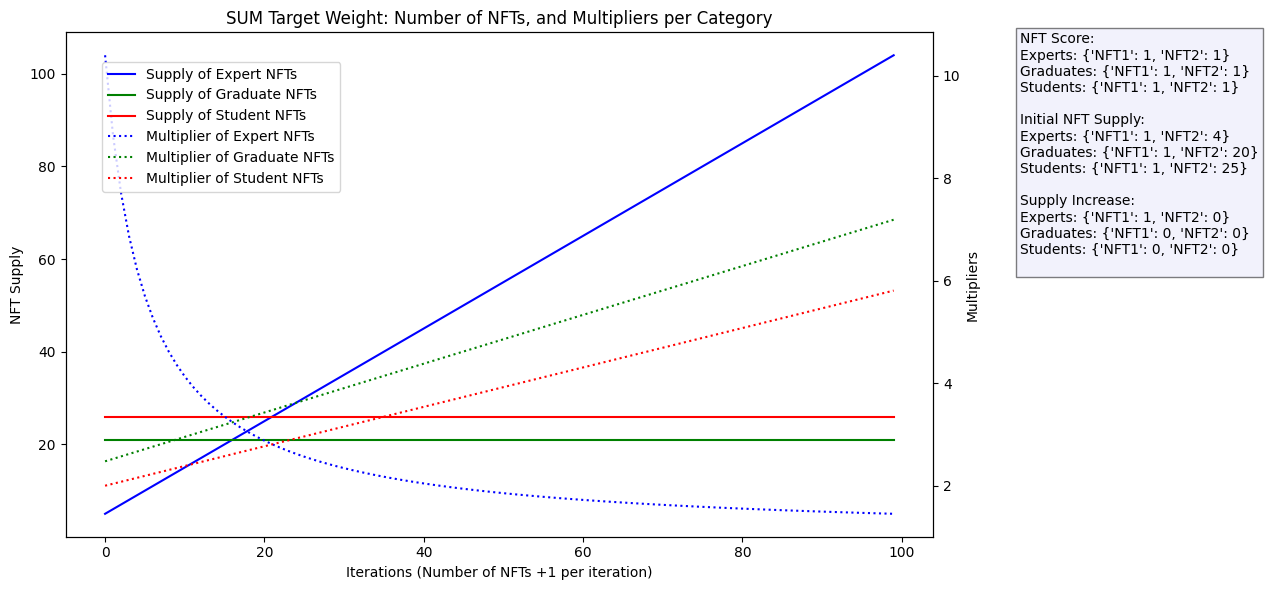

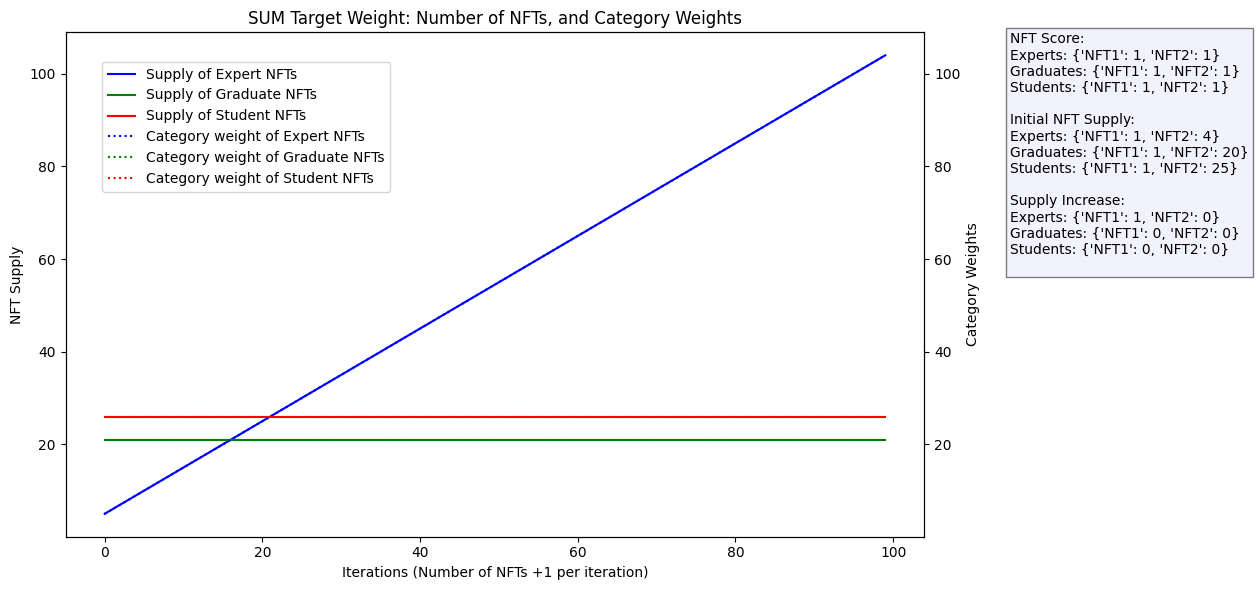

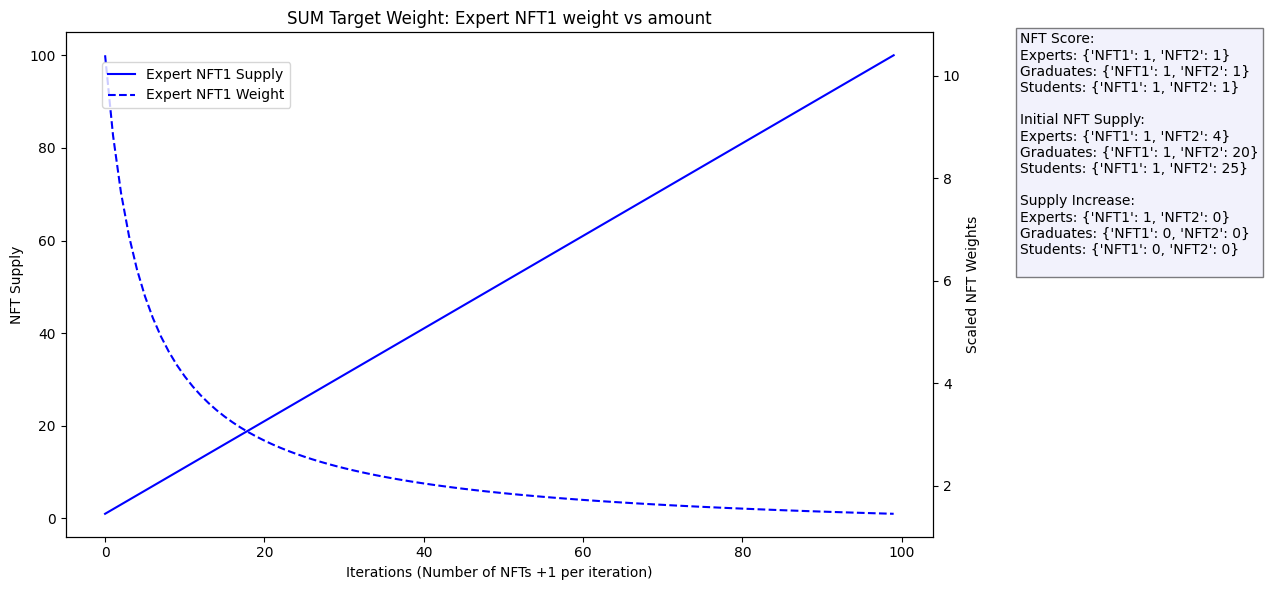

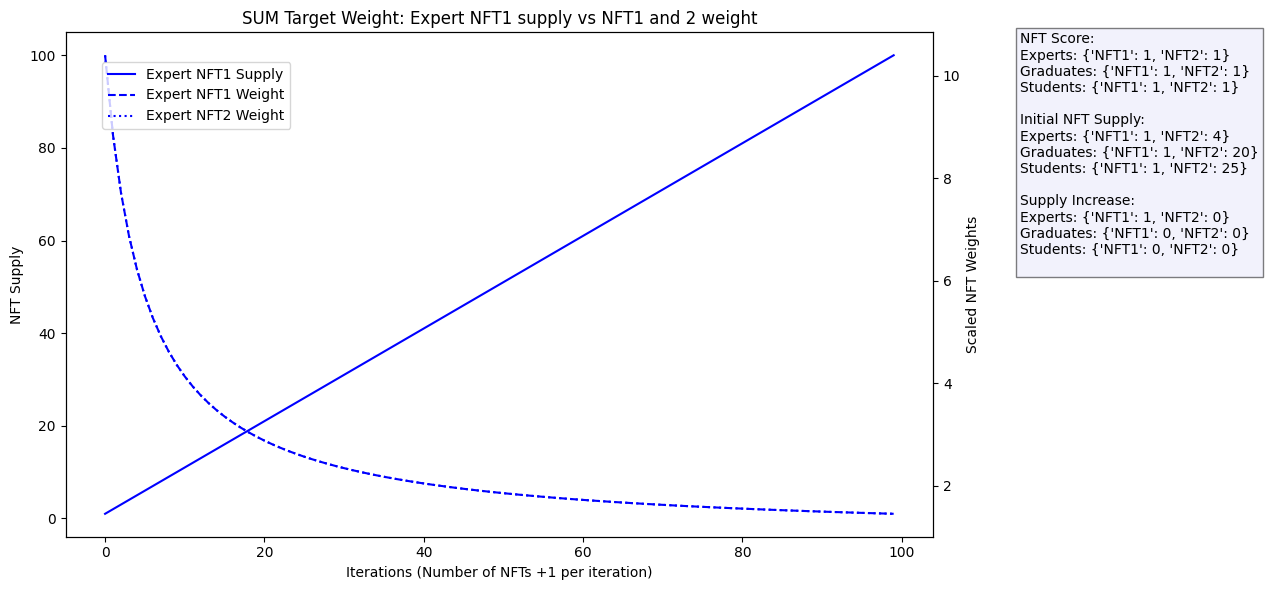

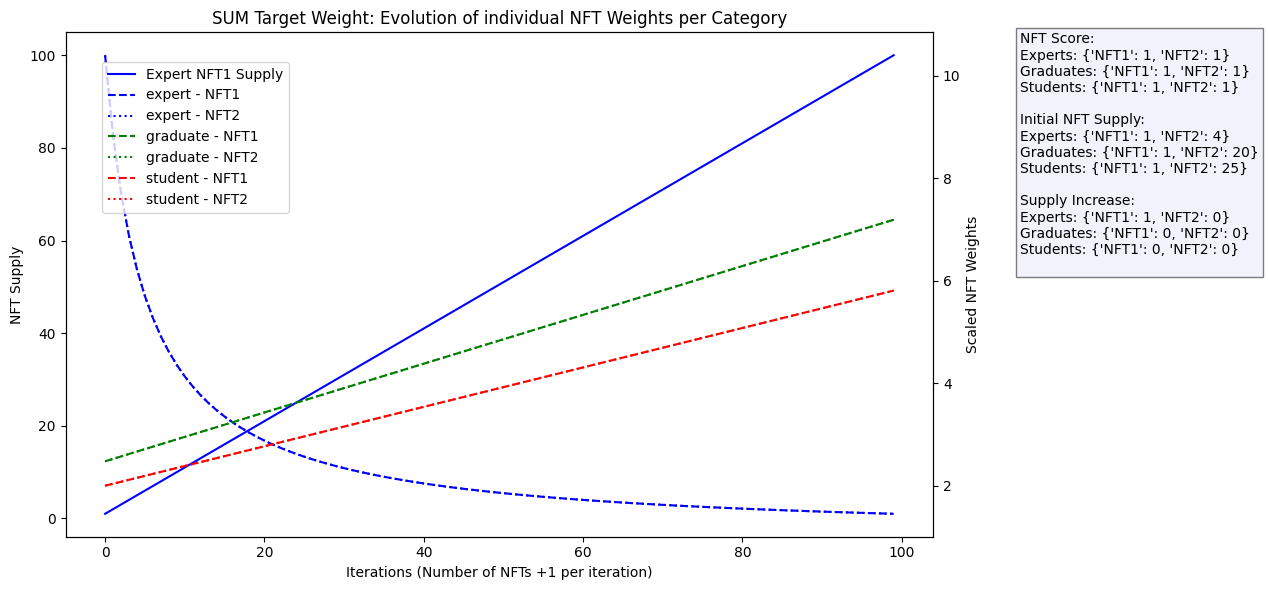

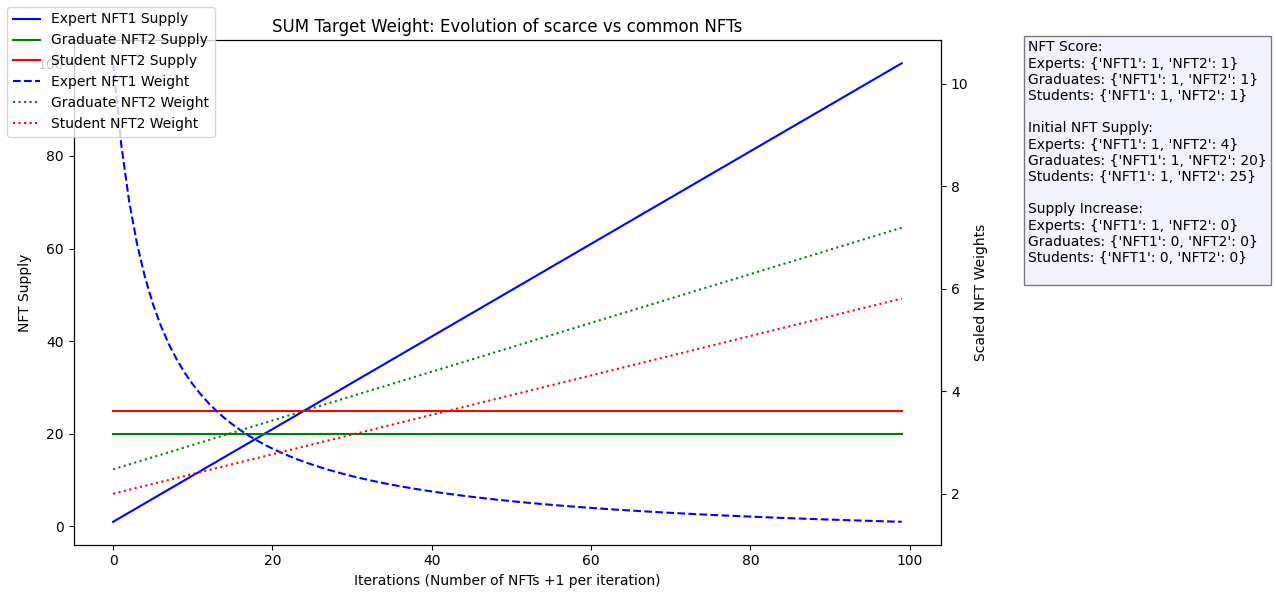

<ipython-input-4-3002abcad89b>:257: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))


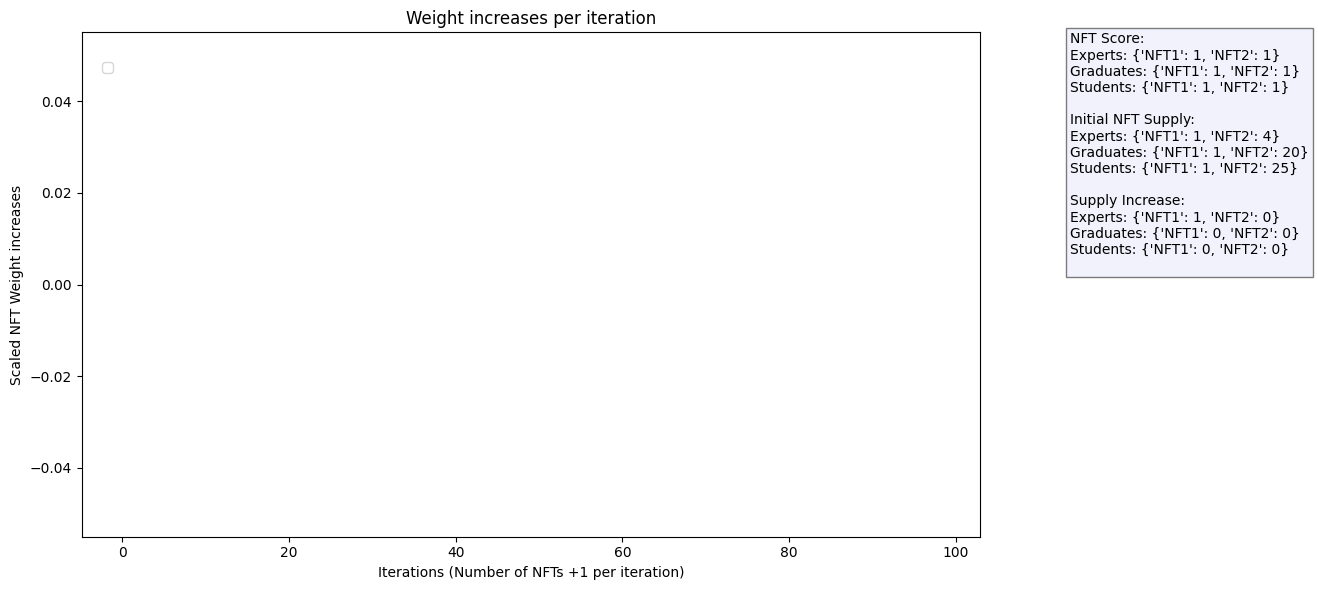

In [4]:
#############
## RESULTS ##
#############

#print("Multipliers")
#print(multipliers)
#print("Category weights")
#print(category_weights)
#print("New weights")
#print(new_nft_weights)

############
## GRAPHS ##
############

### Text box for graph clarity ###
textbox = '\n'.join([
    'NFT Score:',
    f"Experts: {nft_score['expert']}",
    f"Graduates: {nft_score['graduate']}",
    f"Students: {nft_score['student']}",
    '',
    'Initial NFT Supply:',
    f"Experts: {initial_nft_supply['expert']}",
    f"Graduates: {initial_nft_supply['graduate']}",
    f"Students: {initial_nft_supply['student']}",
    '',
    'Supply Increase:',
    f"Experts: {supply_updates['expert']}",
    f"Graduates: {supply_updates['graduate']}",
    f"Students: {supply_updates['student']}",
    '',
])

### Multipliers ###
# print the multiplier graphs

# Create the total weights plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

bbox = dict(boxstyle='square', facecolor='lavender', alpha=0.5)
fig.text(1.1, 1, textbox, fontsize=10, transform=ax1.transAxes, bbox=bbox,
verticalalignment='top')

# Plot target_weight and number of NFTs on the primary y-axis (ax1)
#ax1.plot(range(iterations), target_weights, label='Target Weight', color='black', linestyle='--')
for category in total_amounts:
    ax1.plot(range(iterations), total_amounts[category], label=f'Supply of {category.capitalize()} NFTs', color=colors[category])

# Set labels for the primary y-axis
ax1.set_xlabel('Iterations (Number of NFTs +1 per iteration)')
ax1.set_ylabel('NFT Supply')
ax1.set_title('SUM Target Weight: Number of NFTs, and Multipliers per Category')

# Create the secondary y-axis (ax2) for multipliers
ax2 = ax1.twinx()

# Plot multipliers for each category on the secondary y-axis (ax2)
for category in multipliers:
    ax2.plot(range(iterations), multipliers[category], label=f'Multiplier of {category.capitalize()} NFTs', color=colors[category], linestyle=':')

# Set labels for the secondary y-axis
ax2.set_ylabel('Multipliers')

# Combine legends from both y-axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.tight_layout()
plt.show()

### Category weights ###
# Print the category weights graphs

# Create the total weights plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

bbox = dict(boxstyle='square', facecolor='lavender', alpha=0.5)
fig.text(1.1, 1, textbox, fontsize=10, transform=ax1.transAxes, bbox=bbox,
verticalalignment='top')

# Plot target_weight and number of NFTs on the primary y-axis (ax1)
#ax1.plot(range(iterations), target_weights, label='Target Weight', color='black', linestyle='--')
for category in total_amounts:
    ax1.plot(range(iterations), total_amounts[category], label=f'Supply of {category.capitalize()} NFTs', color=colors[category])

# Set labels for the primary y-axis
ax1.set_xlabel('Iterations (Number of NFTs +1 per iteration)')
ax1.set_ylabel('NFT Supply')
ax1.set_title('SUM Target Weight: Number of NFTs, and Category Weights')

# Create the secondary y-axis (ax2) for multipliers
ax2 = ax1.twinx()

# Plot multipliers for each category on the secondary y-axis (ax2)
for category in category_weights:
    ax2.plot(range(iterations), category_weights[category], label=f'Category weight of {category.capitalize()} NFTs', color=colors[category], linestyle=':')

# Set labels for the secondary y-axis
ax2.set_ylabel('Category Weights')

# Combine legends from both y-axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.tight_layout()
plt.show()

#### NFT1 supply vs NFT1 weight ####
# Print the weight and number of the NFT being changed

# Create the individual weights plot
fig, ax1 = plt.subplots(figsize=(10, 6))

bbox = dict(boxstyle='square', facecolor='lavender', alpha=0.5)
fig.text(1.1, 1, textbox, fontsize=10, transform=ax1.transAxes, bbox=bbox,
verticalalignment='top')

# Plot target_weight and number of NFTs on the primary y-axis (ax1)
ax1.plot(range(iterations), nft_supplies['expert']['NFT1'], label='Expert NFT1 Supply', color=colors['expert'])

# Set labels for the primary y-axis
ax1.set_xlabel('Iterations (Number of NFTs +1 per iteration)')
ax1.set_ylabel('NFT Supply')
ax1.set_title('SUM Target Weight: Expert NFT1 weight vs amount')

# Create the secondary y-axis (ax2) for multipliers
ax2 = ax1.twinx()
ax2.set_ylabel('Scaled NFT Weights')

# Plot individual NFT weight
ax2.plot(range(iterations), nft_weights['expert']['NFT1'], label='Expert NFT1 Weight', color=colors['expert'], linestyle=line_styles['NFT1'])

fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.tight_layout()
plt.show()

#### NFT1 supply vs NFT1 and NFT2 weight ####
# Print the weight and number of the NFT being changed

# Create the individual weights plot
fig, ax1 = plt.subplots(figsize=(10, 6))

bbox = dict(boxstyle='square', facecolor='lavender', alpha=0.5)
fig.text(1.1, 1, textbox, fontsize=10, transform=ax1.transAxes, bbox=bbox,
verticalalignment='top')

# Plot target_weight and number of NFTs on the primary y-axis (ax1)
ax1.plot(range(iterations), nft_supplies['expert']['NFT1'], label='Expert NFT1 Supply', color=colors['expert'])

# Set labels for the primary y-axis
ax1.set_xlabel('Iterations (Number of NFTs +1 per iteration)')
ax1.set_ylabel('NFT Supply')
ax1.set_title('SUM Target Weight: Expert NFT1 supply vs NFT1 and 2 weight')

# Create the secondary y-axis (ax2) for multipliers
ax2 = ax1.twinx()
ax2.set_ylabel('Scaled NFT Weights')

# Plot individual NFT weight
ax2.plot(range(iterations), nft_weights['expert']['NFT1'], label='Expert NFT1 Weight', color=colors['expert'], linestyle=line_styles['NFT1'])
ax2.plot(range(iterations), nft_weights['expert']['NFT2'], label='Expert NFT2 Weight', color=colors['expert'], linestyle=line_styles['NFT2'])

fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.tight_layout()
plt.show()

#### Individual NFT weights ####
# Print the weights of all NFTs over time

# Create the individual weights plot
fig, ax1 = plt.subplots(figsize=(10, 6))

bbox = dict(boxstyle='square', facecolor='lavender', alpha=0.5)
fig.text(1.1, 1, textbox, fontsize=10, transform=ax1.transAxes, bbox=bbox,
verticalalignment='top')

# Plot target_weight and number of NFTs on the primary y-axis (ax1)
ax1.plot(range(iterations), nft_supplies['expert']['NFT1'], label='Expert NFT1 Supply', color=colors['expert'])

# Set labels for the primary y-axis
ax1.set_xlabel('Iterations (Number of NFTs +1 per iteration)')
ax1.set_ylabel('NFT Supply')
ax1.set_title('SUM Target Weight: Evolution of individual NFT Weights per Category')

# Create the secondary y-axis (ax2) for multipliers
ax2 = ax1.twinx()
ax2.set_ylabel('Scaled NFT Weights')

# Plot individual NFT weights
for category in nft_weights:
    for nft_type in nft_weights[category]:
        values = nft_weights[category][nft_type]
        ax2.plot(range(iterations), values, label=f'{category} - {nft_type}', color=colors[category], linestyle=line_styles[nft_type])

fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.tight_layout()
plt.show()

#### Scarce NFT vs common NFT ####
# Print the weights of all NFTs over time

# Create the individual weights plot
fig, ax1 = plt.subplots(figsize=(10, 6))

bbox = dict(boxstyle='square', facecolor='lavender', alpha=0.5)
fig.text(1.1, 1, textbox, fontsize=10, transform=ax1.transAxes, bbox=bbox,
verticalalignment='top')

# Plot target_weight and number of NFTs on the primary y-axis (ax1)
ax1.plot(range(iterations), nft_supplies['expert']['NFT1'], label='Expert NFT1 Supply', color=colors['expert'])
ax1.plot(range(iterations), nft_supplies['graduate']['NFT2'], label='Graduate NFT2 Supply', color=colors['graduate'])
ax1.plot(range(iterations), nft_supplies['student']['NFT2'], label='Student NFT2 Supply', color=colors['student'])

# Set labels for the primary y-axis
ax1.set_xlabel('Iterations (Number of NFTs +1 per iteration)')
ax1.set_ylabel('NFT Supply')
ax1.set_title('SUM Target Weight: Evolution of scarce vs common NFTs')

# Create the secondary y-axis (ax2) for multipliers
ax2 = ax1.twinx()
ax2.set_ylabel('Scaled NFT Weights')

# Plot individual NFT weights
# Plot individual NFT weight
ax2.plot(range(iterations), nft_weights['expert']['NFT1'], label='Expert NFT1 Weight', color=colors['expert'], linestyle=line_styles['NFT1'])
ax2.plot(range(iterations), nft_weights['graduate']['NFT2'], label='Graduate NFT2 Weight', color=colors['graduate'], linestyle=line_styles['NFT2'])
ax2.plot(range(iterations), nft_weights['student']['NFT2'], label='Student NFT2 Weight', color=colors['student'], linestyle=line_styles['NFT2'])


fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.tight_layout()
plt.show()

#### Weight increases vs previous ####
fig, ax1 = plt.subplots(figsize=(10, 6))

bbox = dict(boxstyle='square', facecolor='lavender', alpha=0.5)
fig.text(1.1, 1, textbox, fontsize=10, transform=ax1.transAxes, bbox=bbox,
verticalalignment='top')

ax1.stackplot(range(iterations -1), nft_weight_increases['expert']['NFT1'])
ax1.stackplot(range(iterations -1), nft_weight_increases['expert']['NFT2'])

ax1.set_xlabel('Iterations (Number of NFTs +1 per iteration)')
ax1.set_ylabel('Scaled NFT Weight increases')
ax1.set_title('Weight increases per iteration')

fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.tight_layout()
plt.show()